In [2]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt

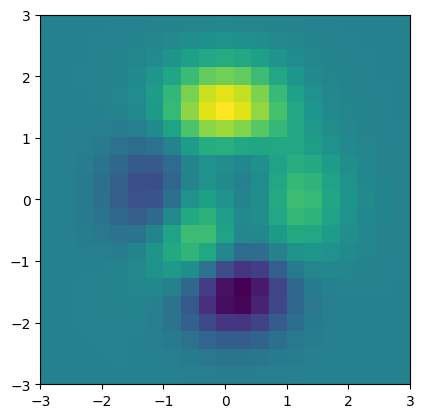

In [57]:
# In numpy
def func(x_range, y_range):
    X,Y = np.meshgrid(x_range, y_range)
    z = 3*(1-X)**2 * np.exp(-(X**2) - (Y+1)**2) \
      - 10*(X/5 - X**3 - Y**5) * np.exp(-X**2-Y**2) \
      - 1/3*np.exp(-(X+1)**2 - Y**2)
    return z
    
xx = np.linspace(-3, 3, 21)

plt.imshow(func(xx, xx), origin='lower', extent=[-3, 3, -3, 3])



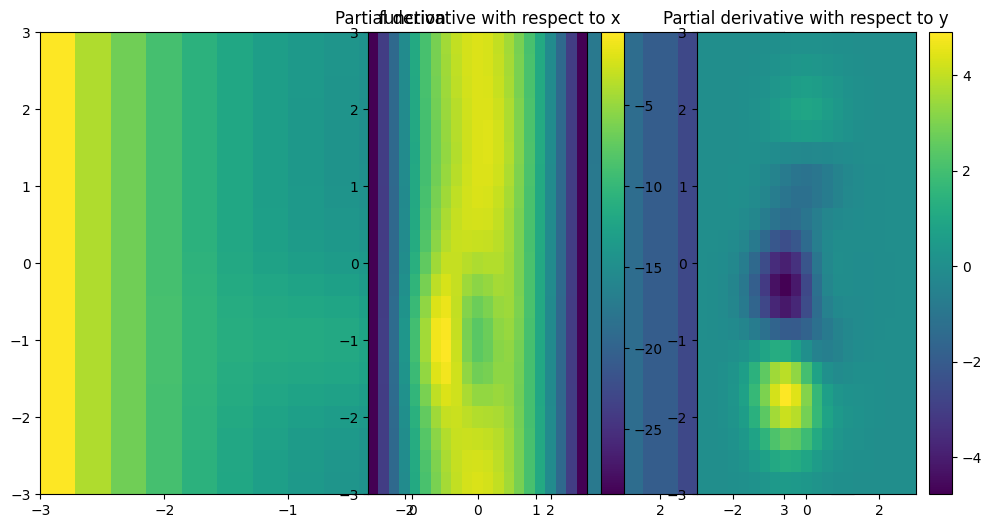

In [73]:
# in sympy
x, y = sym.symbols('x y')
exp = 3*((1-x)**2) * sym.exp( -(x**2) - (y + 1)**2) - 10*(x / 5) - x**3 - y**5 * sym.exp(-(x**2) - (y**2)) - ((1/3)*(sym.exp( - (x+1)**2 - y**2)))

dfx = sym.diff(exp, x, 1)
dfy = sym.diff(exp, y, 1)

f = sym.lambdify((x,y), exp)
diff_x = sym.lambdify((x, y), dfx)
diff_y = sym.lambdify((x, y), dfy)

xx = np.linspace(-3, 3, 21)

X,Y = np.meshgrid(xx, xx)

plt.figure(figsize=(12, 6))

plt.subplot(1, 1, 1)
plt.title("function")
plt.imshow(f(X,Y), extent=[-3, 3, -3, 3], origin='lower', aspect='auto')
plt.colorbar()


plt.subplot(1, 3, 2)
plt.title("Partial derivative with respect to x")
plt.imshow(diff_x(X,Y), extent=[-3, 3, -3, 3], origin='lower', aspect='auto')
plt.colorbar()

plt.subplot(1, 3, 3)
plt.title("Partial derivative with respect to y")
plt.imshow(diff_y(X,Y), extent=[-3, 3, -3, 3], origin='lower', aspect='auto')
plt.colorbar()

plt.show()

[nan, nan]


<lambdifygenerated-20>:2: RuntimeWarning: overflow encountered in scalar power
  return -3*x**2 + 2*x*y**5*exp(-x**2 - y**2) - 6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2) - 2
<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -3*x**2 + 2*x*y**5*exp(-x**2 - y**2) - 6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2) - 2
<lambdifygenerated-21>:2: RuntimeWarning: overflow encountered in scalar power
  return 2*y**6*exp(-x**2 - y**2) - 5*y**4*exp(-x**2 - y**2) + 0.666666666666667*y*exp(-y**2 - (x + 1)**2) + 3*(1 - x)**2*(-2*y - 2)*exp(-x**2 - (y + 1)**2)
<lambdifygenerated-21>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return 2*y**6*exp(-x**2 - y**2) - 5*y**4*exp(-x**2 - y**2) + 0.666666666666667*y*exp(-y**2 - (x + 1)**2) + 3*(1 - x)**2*(-2*y - 2)*exp(-x**2 

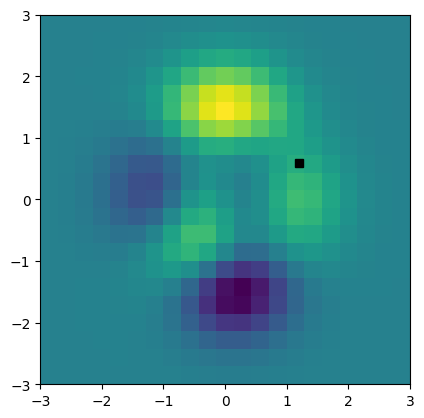

In [67]:
# implementing gradient descent
learning_rate = 0.01
epochs = 1000

random_location = [np.random.choice(xx), np.random.choice(xx)]

plt.plot(random_location[0], random_location[1], 's:', color='black')

for i in range(epochs):
    # gradx, grady = np.gradient(random_location[0], random_location[1])
    gradx = diff_x(random_location[0], random_location[1])
    grady = diff_y(random_location[0], random_location[1])
    new_x = random_location[0] - (gradx*learning_rate)
    new_y = random_location[1] - (grady*learning_rate)
    random_location = [new_x, new_y]
    # plt.plot(random_location[0], random_location[1], 'o', markersize = '3', color='pink')

print(random_location)
plt.plot(random_location[0], random_location[1], 'd', color='r')
plt.imshow(func(xx, xx), origin='lower', extent=[-3, 3, -3, 3])


<lambdifygenerated-20>:2: RuntimeWarning: overflow encountered in scalar multiply
  return -3*x**2 + 2*x*y**5*exp(-x**2 - y**2) - 6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2) - 2
<lambdifygenerated-20>:2: RuntimeWarning: invalid value encountered in scalar multiply
  return -3*x**2 + 2*x*y**5*exp(-x**2 - y**2) - 6*x*(1 - x)**2*exp(-x**2 - (y + 1)**2) - 0.333333333333333*(-2*x - 2)*exp(-y**2 - (x + 1)**2) + 3*(2*x - 2)*exp(-x**2 - (y + 1)**2) - 2


[0.5999999999999996, -2.7]
[nan nan]


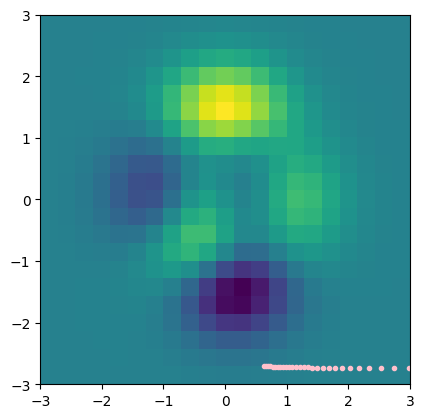

In [70]:
# Mike's Solution
# implementing gradient descent
learning_rate = 0.01
epochs = 1000

random_location = [np.random.choice(xx), np.random.choice(xx)]
start = random_location[:]

for i in range(epochs):
    grad = np.array([diff_x(random_location[0], random_location[1]), diff_y(random_location[0], random_location[1])])
    random_location = random_location - grad*learning_rate
    plt.plot(random_location[0], random_location[1], 'o', markersize = '3', color='pink')

print(start)
print(random_location)
plt.plot(random_location[0], random_location[1], 'd', color='r')
plt.imshow(func(xx, xx), origin='lower', extent=[-3, 3, -3, 3])
